In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes = True)

In [ ]:
df = pd.read_csv('kidneydisease.csv')

In [ ]:
df.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80,1.020,1,0,1,36.0,1.2,137.53,4.63,15.4,7800,5.20,1.0,1
1,50,1.020,4,0,1,18.0,0.8,137.53,4.63,11.3,6000,4.71,0.0,1
2,80,1.010,2,3,1,53.0,1.8,137.53,4.63,9.6,7500,4.71,0.0,1
3,70,1.005,4,0,1,56.0,3.8,111.00,2.50,11.2,6700,3.90,1.0,1
4,80,1.010,2,0,1,26.0,1.4,137.53,4.63,11.6,7300,4.60,0.0,1


In [ ]:
#exploratory data analysis

<Axes: xlabel='Htn', ylabel='count'>

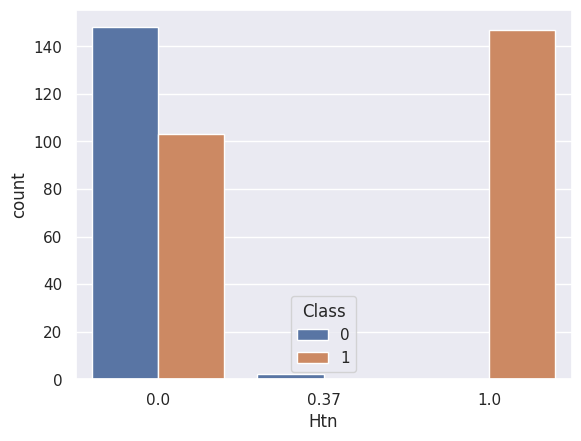

In [ ]:
sns.countplot(data=df,x="Htn",hue="Class")

<Axes: xlabel='Rbc', ylabel='count'>

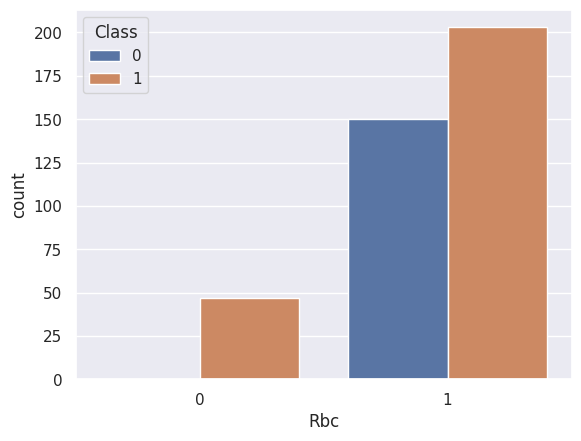

In [ ]:
sns.countplot(data=df,x="Rbc",hue="Class")

<Axes: xlabel='Bp', ylabel='count'>

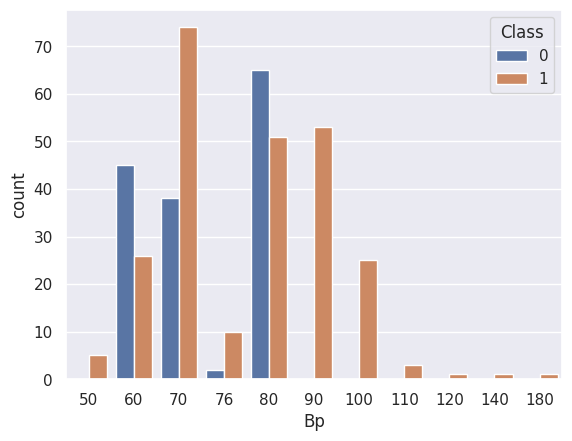

In [ ]:
sns.countplot(data=df,x="Bp",hue="Class")

<Axes: xlabel='Sc', ylabel='count'>

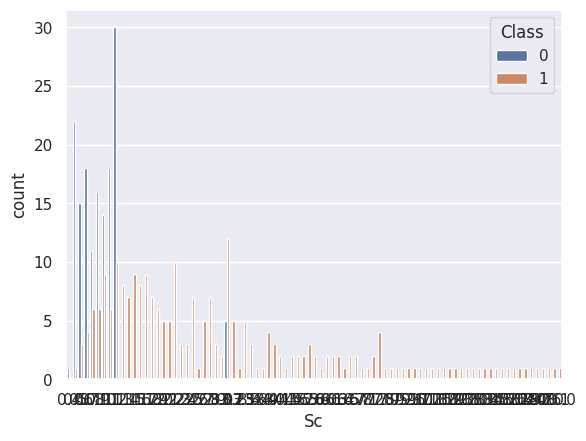

In [ ]:
sns.countplot(data=df,x="Sc",hue="Class")

<Axes: xlabel='Bp', ylabel='Count'>

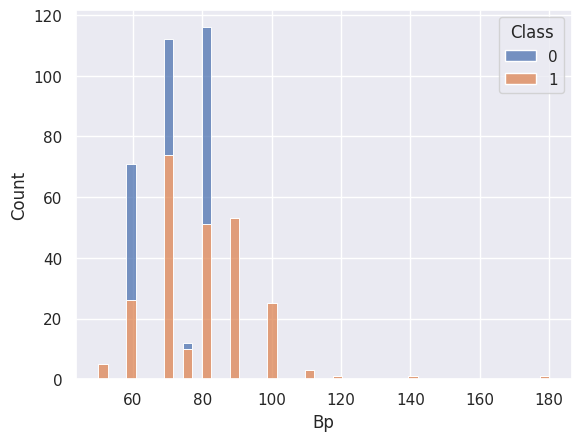

In [ ]:
sns.histplot(data=df,x="Bp",hue="Class",multiple="stack")

In [ ]:
#Data preprocessing

1    250
0    150
Name: Class, dtype: int64


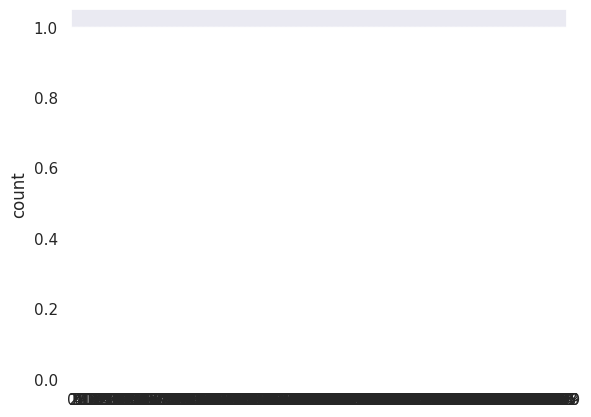

In [ ]:
sns.countplot(df['Class'])
print(df.Class.value_counts())

In [ ]:
from sklearn.utils import resample

df_majority=df[(df['Class']==1)]
df_minority=df[(df['Class']==0)]

upsample_minor=resample(df_minority,
                       n_samples=250,
                       random_state=0)

df2=pd.concat([upsample_minor,df_majority])
df2.shape

(500, 14)

0    250
1    250
Name: Class, dtype: int64


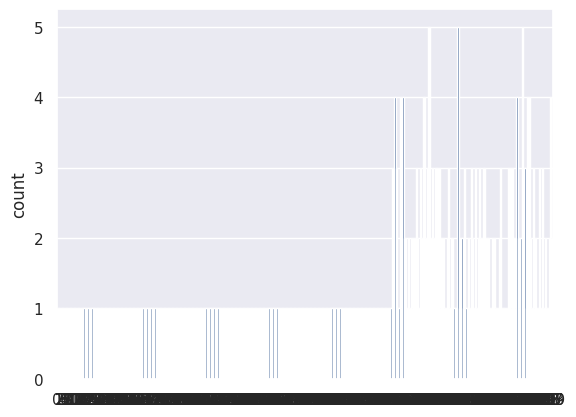

In [ ]:
sns.countplot(df2['Class'])
print(df2.Class.value_counts())

<Axes: xlabel='Bp'>

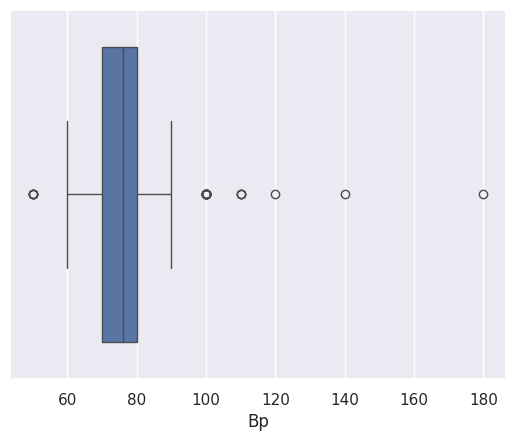

In [ ]:
sns.boxplot(x=df2["Bp"])

<Axes: xlabel='Sg'>

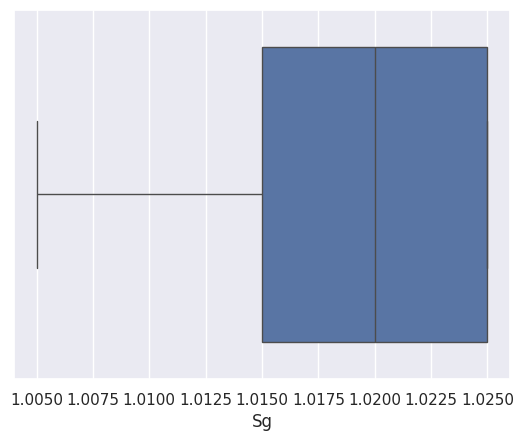

In [ ]:
sns.boxplot(x=df2["Sg"])

<Axes: xlabel='Bu'>

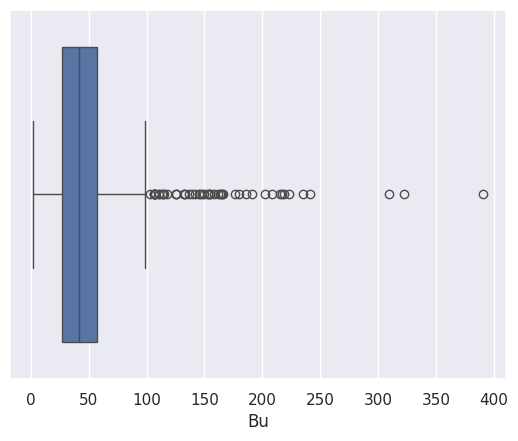

In [ ]:
sns.boxplot(x=df2["Bu"])

<Axes: xlabel='Sc'>

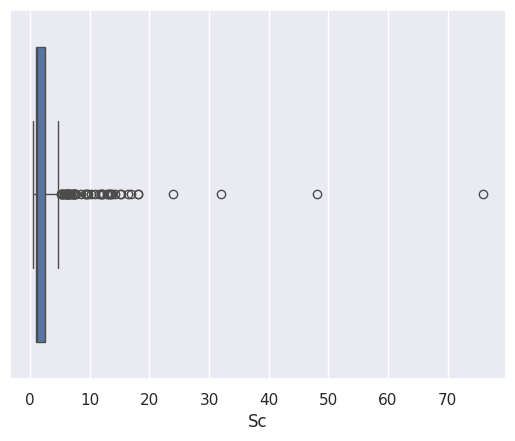

In [ ]:
sns.boxplot(x=df2["Sc"])

<Axes: xlabel='Rbcc'>

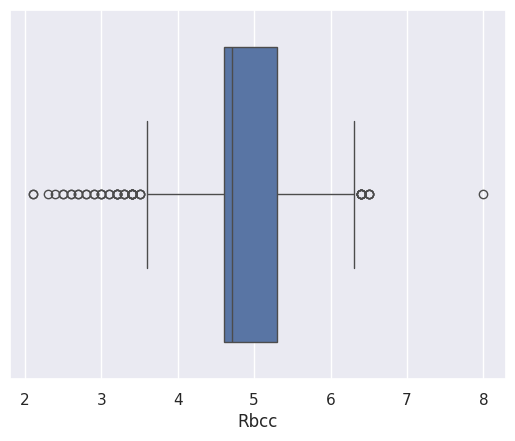

In [ ]:
sns.boxplot(x=df2["Rbcc"])

In [ ]:
#remove outliers by z score

In [ ]:
import scipy.stats as stats
z=np.abs(stats.zscore(df2))
data_clean=df2[(z<2).all(axis=1)]
data_clean.shape


(380, 14)

<Axes: xlabel='Bu'>

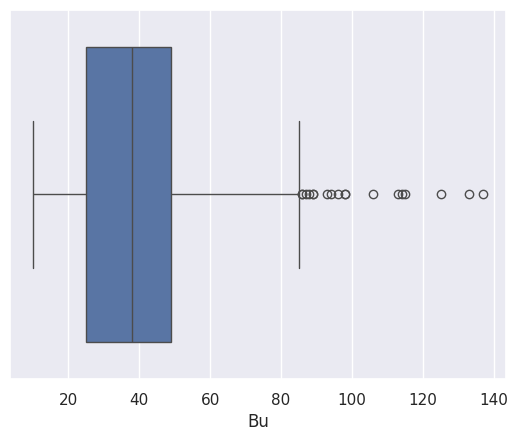

In [ ]:
sns.boxplot(x=data_clean["Bu"])

<Axes: xlabel='Wbcc'>

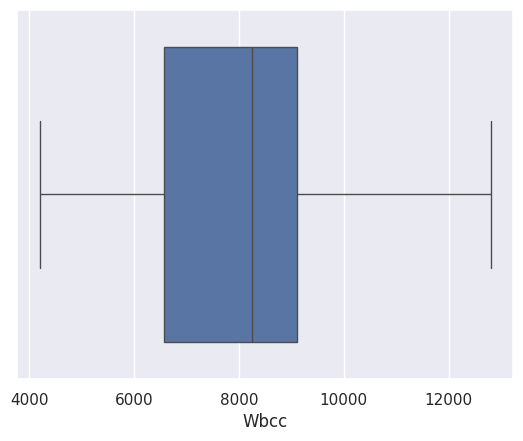

In [ ]:
sns.boxplot(x=data_clean["Wbcc"])

<Axes: xlabel='Wbcc'>

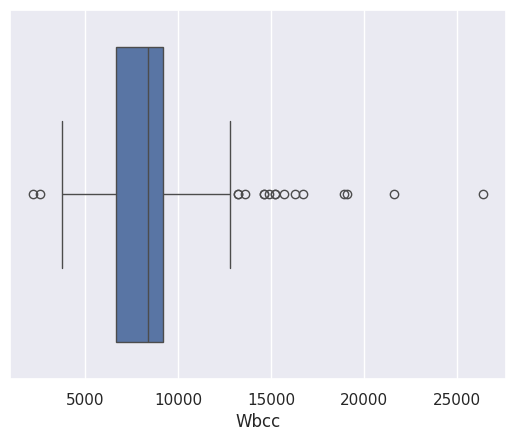

In [ ]:
sns.boxplot(x=df2["Wbcc"])

<Axes: xlabel='Bp'>

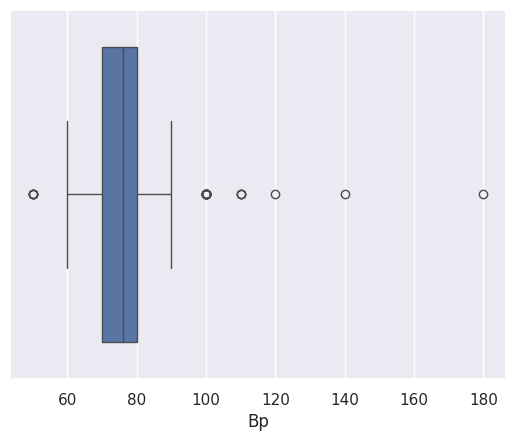

In [ ]:
sns.boxplot(x=df2["Bp"])

<Axes: xlabel='Bp'>

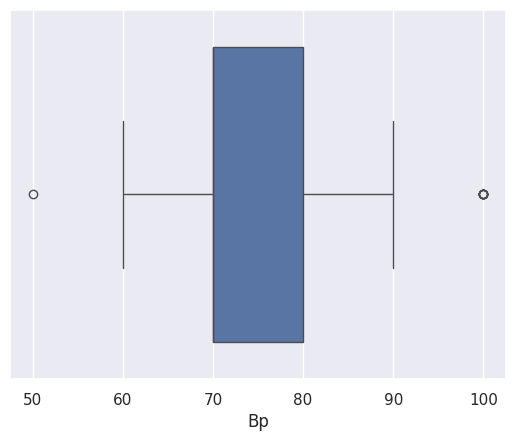

In [ ]:
sns.boxplot(x=data_clean["Bp"])

<Axes: >

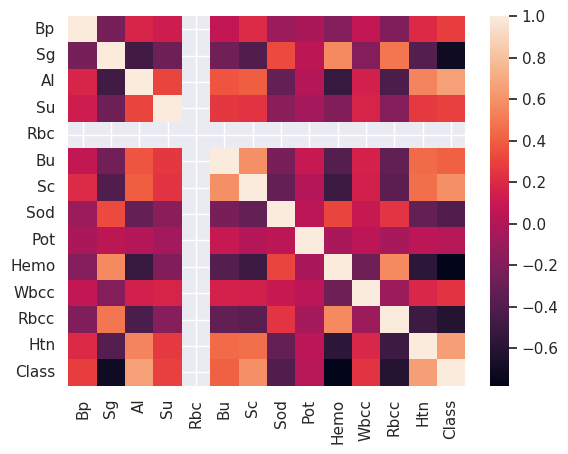

In [ ]:
sns.heatmap(data_clean.corr(),fmt='.2g')

In [ ]:
data_clean2=df.drop(columns=['Rbc'])

<Axes: >

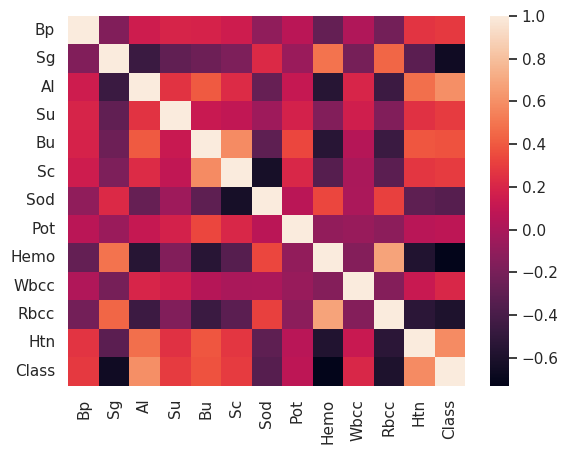

In [ ]:
sns.heatmap(data_clean2.corr(),fmt='.2g')

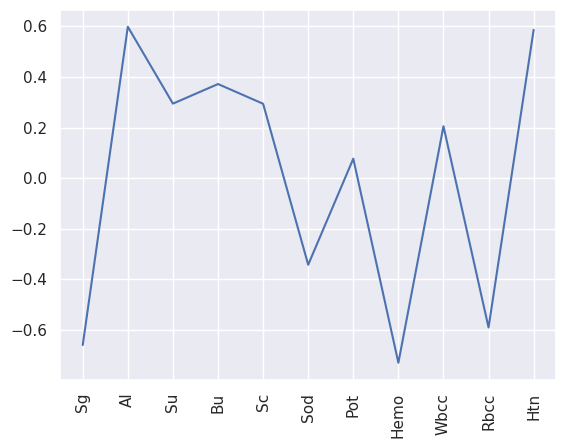

In [ ]:
corr=data_clean2[data_clean2.columns[1:]].corr()['Class'][:-1]
plt.plot(corr)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#random forest

In [ ]:
X=data_clean2.drop('Class',axis=1)
y=data_clean2['Class']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred=rfc.predict(X_test)

In [ ]:
print("accuracy Score: ",round(accuracy_score(y_test,y_pred)*100,2),"%")

accuracy Score:  100.0 %


In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print('F-1 Score :',(f1_score(y_test,y_pred)))
print('Precision Score :',(precision_score(y_test,y_pred)))
print('Recall Score :',(recall_score(y_test,y_pred)))

F-1 Score : 1.0
Precision Score : 1.0
Recall Score : 1.0


Text(0.5, 1.0, 'Accuracy score: 100.0')

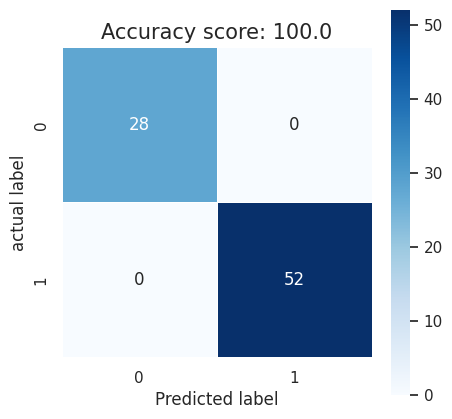

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths=.5,annot=True,square=True,cmap="Blues")
plt.ylabel('actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy score: {0}'.format(rfc.score(X_test,y_test)*100)
plt.title(all_sample_title,size=15)

In [ ]:
#KNearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(X_test)
print("accuracy score",round(accuracy_score(y_test,y_pred)*100,2),"%")

accuracy score 62.5 %


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
y_pred=lr.predict(X_test)
print("accuracy score",round(accuracy_score(y_test,y_pred)*100,2),"%")

accuracy score 93.75 %


In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print('F-1 Score :',(f1_score(y_test,y_pred)))
print('Precision Score :',(precision_score(y_test,y_pred)))
print('Recall Score :',(recall_score(y_test,y_pred)))

F-1 Score : 0.9504950495049506
Precision Score : 0.9795918367346939
Recall Score : 0.9230769230769231


Text(0.5, 1.0, 'Accuracy score: 93.75')

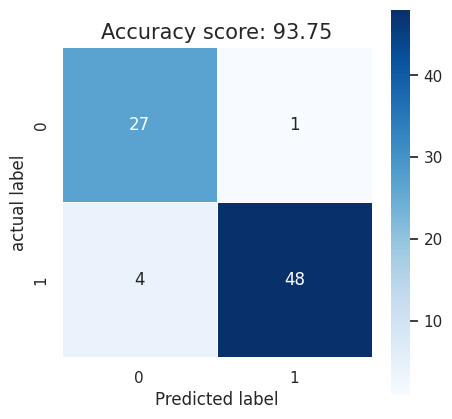

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths=.5,annot=True,square=True,cmap="Blues")
plt.ylabel('actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy score: {0}'.format(rfc.score(X_test,y_pred)*100)
plt.title(all_sample_title,size=15)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(random_state=0)
ada.fit(X_train,y_train)

AdaBoostClassifier(random_state=0)

In [ ]:
y_pred=ada.predict(X_test)
print("accuracy score",round(accuracy_score(y_test,y_pred)*100,2),"%")

accuracy score 98.75 %


In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print('F-1 Score :',(f1_score(y_test,y_pred)))
print('Precision Score :',(precision_score(y_test,y_pred)))
print('Recall Score :',(recall_score(y_test,y_pred)))

F-1 Score : 0.9902912621359222
Precision Score : 1.0
Recall Score : 0.9807692307692307


Text(0.5, 1.0, 'Accuracy score: 98.75')

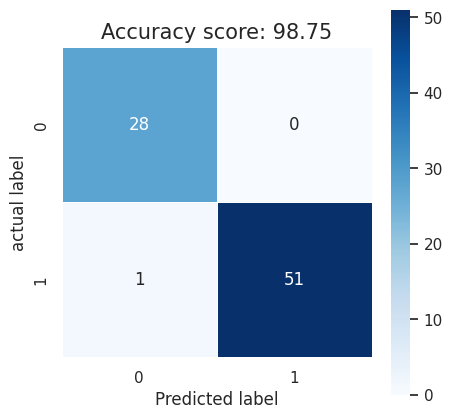

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths=.5,annot=True,square=True,cmap="Blues")
plt.ylabel('actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy score: {0}'.format(rfc.score(X_test,y_pred)*100)
plt.title(all_sample_title,size=15)